In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re

In [0]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',7000)

In [3]:
from google.colab import files
files.upload()

Saving games test.csv to games test (1).csv


{'games test.csv': b'review_id,title,year,user_review\r\n1603,Counter-Strike: Global Offensive,2015,"Nice graphics, new maps, weapons and models. But developers should listen to the customers a bit more. Developers you are focused too much on things that are not important at all. You should focus on changing the tick rate of the match making servers to 128 and improving VAC a lot. Those two are what customers really want and you should focus on. Not stickers, UI and HUD changes or skins. And stop messing around with the weapons."\r\n1604,Counter-Strike: Global Offensive,2018,"I would not recommend getting into this at its current state. CSGO has hit rock bottom with Valve\'s missed promises of game changing updates and their lack of effort to combat the terrible cheating problem. Bugs have been in the game for years and still haven\'t been fixed. Cheating is out of control. Over the past few years of playing, cheating has gotten worse and worse to the point now where I end up playing a

In [0]:
Dframe=pd.read_csv('games test.csv')

In [0]:
Dframe=Dframe.dropna()

In [45]:
Dframe

Text  \
0     Counter-Strike: Global Offensive Nice graphics...   
1     Counter-Strike: Global Offensive I would not r...   
2     Counter-Strike: Global Offensive Edit 11/12/18...   
3     Counter-Strike: Global Offensive The game is g...   
4     Counter-Strike: Global Offensive I thank Truly...   
...                                                 ...   
8039  GUNS UP! It is so much pay2win game... it woul...   
8040  GUNS UP! Early Access ReviewGuns UP!Positive: ...   
8041  GUNS UP! After 170 hrs, my review. DO NOT SPEN...   
8042  GUNS UP! Pros:-Fun GameplayCons: -Micro %$#*in...   
8043  GUNS UP! Actualy saucy, I definetly suggest to...   

                                                Alltext  
0     counter strike global offensive nice graphics ...  
1     counter strike global offensive would not reco...  
2     counter strike global offensive edit have trie...  
3     counter strike global offensive the game great...  
4     counter strike global offensive thank trulyraz...  
...                                                 ...  
8039  guns much pay win game would better will cost ...  
8040  guns early access reviewguns positive good ide...  
8041  guns after hrs review not spend any money woul...  
8042  guns pros fun gameplaycons micro ing transacti...  
8043  guns actualy saucy definetly suggest players w...  

[7976 rows x 2 columns]

In [0]:
#Dframe=Dframe.drop(labels=['review_id','year'], axis=1)
Dframe=Dframe.drop(labels=['title','user_review'], axis=1)

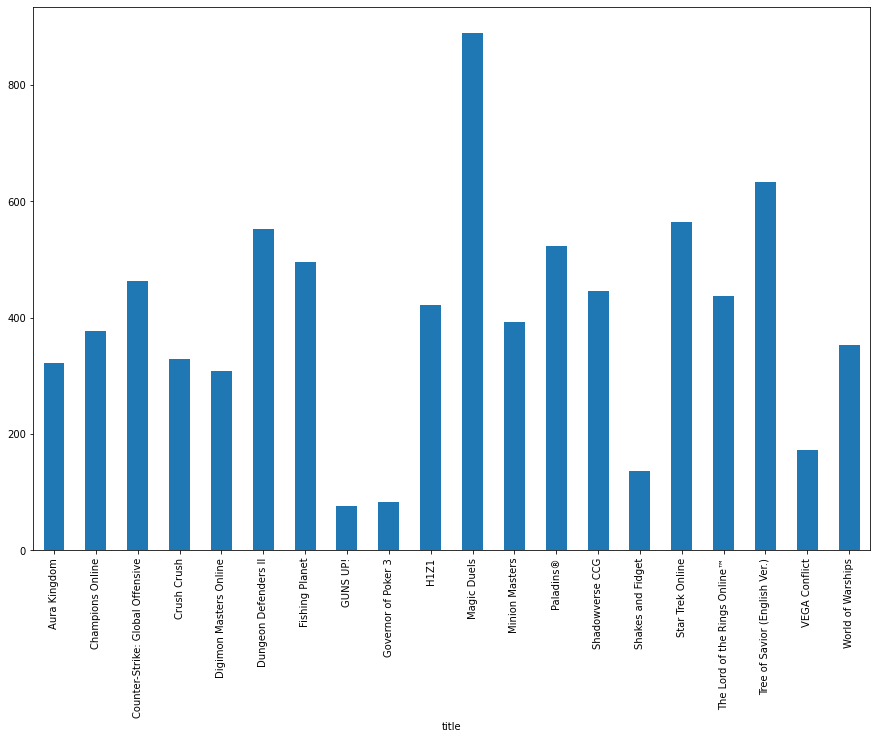

In [37]:
Dframe.groupby('title').size().plot(kind='bar', figsize=(15,10))

In [38]:
Dframe.shape

(7978, 2)

In [0]:
Dframe=Dframe.drop_duplicates()

In [0]:
Dframe['Text']=Dframe['title']+' '+Dframe['user_review']

In [0]:
def cleaning(inpdata):
    cleanedArticle1=re.sub(r'[?|$|(),"".@#=><|!]Â&*/',r' ',inpdata)
    cleanedArticle2=re.sub(r'[^a-zA-Z]',r' ',cleanedArticle1)
    cleanedArticle3=cleanedArticle2.lower()
    cleanedArticle4=re.sub(r'\b\w{1,2}\b', ' ',cleanedArticle3)
    cleanedArticle5=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle4)
    cleanedArticle6=re.sub(r' +', ' ',cleanedArticle5)
    return(cleanedArticle6)
    

In [0]:
Dframe['Alltext']=Dframe['Text'].apply(cleaning)

In [0]:
Dframe=Dframe.drop(labels=['Text'], axis=1)
#Dframe=Dframe.drop(labels=['TXT'], axis=1)

In [0]:
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer 

In [0]:
def Tokeniztion(inpdata):
    tk = RegexpTokenizer('\s+', gaps = True)
    token = tk.tokenize(inpdata)
    return(token)

In [0]:
Dframe['Tokens']=Dframe['Alltext'].apply(Tokeniztion)

In [53]:
Dframe.head()

Alltext  \
0  counter strike global offensive nice graphics ...   
1  counter strike global offensive would not reco...   
2  counter strike global offensive edit have trie...   
3  counter strike global offensive the game great...   
4  counter strike global offensive thank trulyraz...   

                                              Tokens  \
0  [counter, strike, global, offensive, nice, gra...   
1  [counter, strike, global, offensive, would, no...   
2  [counter, strike, global, offensive, edit, hav...   
3  [counter, strike, global, offensive, the, game...   
4  [counter, strike, global, offensive, thank, tr...   

                                                 TXT  
0  [[counter, strike, global, offensive, nice, gr...  
1  [[counter, strike, global, offensive, recommen...  
2  [[counter, strike, global, offensive, edit, tr...  
3  [[counter, strike, global, offensive, game, gr...  
4  [[counter, strike, global, offensive, thank, t...

In [0]:
def Stem_Stop(Inpdata):
    texts=[]
    en_stop = get_stop_words('en')
    LM=WordNetLemmatizer()
    stopped_tokens = [i for i in Inpdata if not i in en_stop]
    porter_stem=[LM.lemmatize(word) for word in stopped_tokens ]
    texts.append(porter_stem)
    return(texts)

In [0]:
Dframe['TXT']=Dframe['Tokens'].apply(Stem_Stop)

In [54]:
Dframe['TXT'][500]

[['world',
  'warship',
  'hundred',
  'hour',
  'came',
  'onto',
  'steam',
  'play',
  'occassion',
  'pas',
  'time',
  'bad',
  'game',
  'get',
  'stale',
  'quick',
  'tier',
  'premium',
  'ship',
  'etc',
  'give',
  'positive',
  'review',
  'every',
  'game',
  'identical',
  'torps',
  'spammed',
  'ship',
  'ranging',
  'destroyer',
  'battleship',
  'battleship',
  'sit',
  'back',
  'lobbing',
  'shell',
  'max',
  'range',
  'reason',
  'get',
  'boring',
  'quickly',
  'like',
  'aggressive',
  'player',
  'isnt',
  'rewarded',
  'game',
  'secondary',
  'battery',
  'rendered',
  'completely',
  'obsolete',
  'torpedo',
  'typical',
  'game',
  'destroyer',
  'charge',
  'pop',
  'smoke',
  'sit',
  'spamming',
  'torps',
  'smoke',
  'clear',
  'pull',
  'back',
  'recharge',
  'repeat',
  'battleship',
  'sit',
  'far',
  'back',
  'lobbing',
  'shell',
  'aircraft',
  'carrier',
  'near',
  'impossible',
  'make',
  'money',
  'hardly',
  'encountered',
  'free',
 

In [0]:
corp=Dframe.TXT
document=[''.join(str(text))for text in corp]

In [56]:
print(corp)

0       [[counter, strike, global, offensive, nice, gr...
1       [[counter, strike, global, offensive, recommen...
2       [[counter, strike, global, offensive, edit, tr...
3       [[counter, strike, global, offensive, game, gr...
4       [[counter, strike, global, offensive, thank, t...
                              ...                        
8039    [[gun, much, pay, win, game, better, will, cos...
8040    [[gun, early, access, reviewguns, positive, go...
8041    [[gun, hr, review, spend, money, seam, better,...
8042    [[gun, pro, fun, gameplaycons, micro, ing, tra...
8043    [[gun, actualy, saucy, definetly, suggest, pla...
Name: TXT, Length: 7976, dtype: object


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfid=TfidfVectorizer()
X=tfid.fit_transform(document)
Frame2=pd.DataFrame(X.toarray(),columns=tfid.get_feature_names())


In [59]:
Frame2

aaa  aaaaaaand  aaaaaah  aaaaannnnddddd  aaaaarrrreeeeee  aaaah  \
0     0.0        0.0      0.0             0.0              0.0    0.0   
1     0.0        0.0      0.0             0.0              0.0    0.0   
2     0.0        0.0      0.0             0.0              0.0    0.0   
3     0.0        0.0      0.0             0.0              0.0    0.0   
4     0.0        0.0      0.0             0.0              0.0    0.0   
...   ...        ...      ...             ...              ...    ...   
7971  0.0        0.0      0.0             0.0              0.0    0.0   
7972  0.0        0.0      0.0             0.0              0.0    0.0   
7973  0.0        0.0      0.0             0.0              0.0    0.0   
7974  0.0        0.0      0.0             0.0              0.0    0.0   
7975  0.0        0.0      0.0             0.0              0.0    0.0   

      aaaallll  aaaand  aaaannd  aaaannnnd  aaall  aaare  aaargh  aaces  aan  \
0          0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   
1          0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   
2          0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   
3          0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   
4          0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   
...        ...     ...      ...        ...    ...    ...     ...    ...  ...   
7971       0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   
7972       0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   
7973       0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   
7974       0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   
7975       0.0     0.0      0.0        0.0    0.0    0.0     0.0    0.0  0.0   

      aand  aariftr  aback  abaixo  abandon  abandonded  abandoned  \
0      0.0      0.0    0.0     0.0      0.0         0.0        0.0   
1      0.0      0.0    0.0     0.0      0.0         0.0        0.0   
2      0.0      0.0    0.0     0.0      0.0         0.0        0.0   
3      0.0      0.0    0.0     0.0      0.0         0.0        0.0   
4      0.0      0.0    0.0     0.0      0.0         0.0        0.0   
...    ...      ...    ...     ...      ...         ...        ...   
7971   0.0      0.0    0.0     0.0      0.0         0.0        0.0   
7972   0.0      0.0    0.0     0.0      0.0         0.0        0.0   
7973   0.0      0.0    0.0     0.0      0.0         0.0        0.0   
7974   0.0      0.0    0.0     0.0      0.0         0.0        0.0   
7975   0.0      0.0    0.0     0.0      0.0         0.0        0.0   

      abandoning  abandonment  abandonned  abandonware  abawuwu  abbandon  \
0            0.0          0.0         0.0          0.0      0.0       0.0   
1            0.0          0.0         0.0          0.0      0.0       0.0   
2            0.0          0.0         0.0          0.0      0.0       0.0   
3            0.0          0.0         0.0          0.0      0.0       0.0   
4            0.0          0.0         0.0          0.0      0.0       0.0   
...          ...          ...         ...          ...      ...       ...   
7971         0.0          0.0         0.0          0.0      0.0       0.0   
7972         0.0          0.0         0.0          0.0      0.0       0.0   
7973         0.0          0.0         0.0          0.0      0.0       0.0   
7974         0.0          0.0         0.0          0.0      0.0       0.0   
7975         0.0          0.0         0.0          0.0      0.0       0.0   

      abble  abboccano  abboccata  abbonement  abbreviated  abc  abd  \
0       0.0        0.0        0.0         0.0          0.0  0.0  0.0   
1       0.0        0.0        0.0         0.0          0.0  0.0  0.0   
2       0.0        0.0        0.0         0.0          0.0  0.0  0.0   
3       0.0        0.0        0.0         0.0          0.0  0.0  0.0   
4       0.0        0.0        0.0         

In [0]:
from gensim import matutils, models
import scipy.sparse

In [0]:
corpusn=matutils.Sparse2Corpus(scipy.sparse.csr_matrix(Frame2))
id2wordn = dict((v, k) for k, v in tfid.vocabulary_.items())

In [0]:
ldn = models.LdaModel(corpus=corpusn, num_topics=20, id2word=id2wordn, passes=50)

In [89]:
ldn.show_topics()

[(1,
  '0.004*"diffcult" + 0.003*"borderless" + 0.003*"anarchy" + 0.003*"aceit" + 0.003*"discard" + 0.003*"absurt" + 0.003*"amonkhet" + 0.003*"disabling" + 0.003*"ditching" + 0.003*"dichotomy"'),
 (19,
  '0.005*"enchance" + 0.004*"chopping" + 0.004*"charactername" + 0.004*"alway" + 0.004*"crashed" + 0.004*"drastic" + 0.004*"chocolate" + 0.004*"decimates" + 0.003*"apreciated" + 0.003*"characaters"'),
 (7,
  '0.003*"boxed" + 0.003*"cheerful" + 0.003*"amass" + 0.003*"amassed" + 0.003*"controllable" + 0.003*"cbts" + 0.003*"dire" + 0.003*"afroninja" + 0.003*"begun" + 0.003*"diehard"'),
 (13,
  '0.001*"bitties" + 0.001*"attractiveness" + 0.001*"compleete" + 0.001*"archive" + 0.001*"boff" + 0.001*"economic" + 0.001*"calculate" + 0.001*"elementsit" + 0.001*"cooperatively" + 0.001*"bunyun"'),
 (6,
  '0.005*"bast" + 0.005*"boardwiping" + 0.004*"acho" + 0.004*"deckscrap" + 0.004*"disheartened" + 0.004*"audio" + 0.004*"discovery" + 0.004*"disobey" + 0.004*"competitor" + 0.004*"achieved"'),
 (9,
  

In [90]:
ldn.print_topics()

[(0,
  '0.006*"addict" + 0.005*"createdyou" + 0.004*"assumption" + 0.004*"admission" + 0.004*"bird" + 0.004*"ano" + 0.004*"agrravated" + 0.004*"archetype" + 0.004*"aidz" + 0.003*"asthetics"'),
 (1,
  '0.004*"diffcult" + 0.003*"borderless" + 0.003*"anarchy" + 0.003*"aceit" + 0.003*"discard" + 0.003*"absurt" + 0.003*"amonkhet" + 0.003*"disabling" + 0.003*"ditching" + 0.003*"dichotomy"'),
 (2,
  '0.001*"bunlar" + 0.001*"adjusting" + 0.001*"cetera" + 0.001*"aimhackers" + 0.001*"cykaaaaaaaaa" + 0.001*"amke" + 0.001*"abundantly" + 0.001*"envyroments" + 0.001*"adiquite" + 0.001*"appreciation"'),
 (3,
  '0.004*"bomblooks" + 0.004*"airdrop" + 0.004*"aggression" + 0.004*"aight" + 0.004*"cfgs" + 0.004*"effort" + 0.004*"bodes" + 0.004*"begrudgingly" + 0.004*"deceptive" + 0.004*"deblooms"'),
 (4,
  '0.003*"accompanies" + 0.003*"countered" + 0.002*"bandwagon" + 0.002*"boden" + 0.002*"advertise" + 0.002*"administration" + 0.002*"anderes" + 0.002*"bloody" + 0.002*"duelsthe" + 0.002*"boxesreally"'),
 (

In [77]:
ldn.top_topics(corpusn)

[([(0.0007577571, 'chages'),
   (0.0007553802, 'arrives'),
   (0.00073873706, 'appreciation'),
   (0.000733321, 'cauterize'),
   (0.0007294363, 'bunlar'),
   (0.00070701336, 'chimaera'),
   (0.0006932126, 'cykaaaaaaaaa'),
   (0.0006916108, 'destiny'),
   (0.0006804105, 'devz'),
   (0.0006755883, 'aloneevery'),
   (0.0006743208, 'eqp'),
   (0.00067069853, 'doe'),
   (0.0006695424, 'adjusting'),
   (0.0006643858, 'adiquite'),
   (0.0006634865, 'blastread'),
   (0.0006590886, 'cetera'),
   (0.0006563386, 'envyroments'),
   (0.0006559963, 'aaaaarrrreeeeee'),
   (0.0006487772, 'aimhackers'),
   (0.00064664846, 'accusingly')],
  -1.642089383320957),
 ([(0.0011897744, 'abillity'),
   (0.0011469735, 'absurd'),
   (0.0011137689, 'abc'),
   (0.0010949933, 'aaaaaah'),
   (0.0010922054, 'contra'),
   (0.0010862846, 'bluehole'),
   (0.0010679383, 'accont'),
   (0.0010641599, 'absolutley'),
   (0.0010414793, 'deckstats'),
   (0.0010213642, 'counting'),
   (0.0010043463, 'bolt'),
   (0.0010034549, 'a